# MRR: Mean Reciprocal Rank (平均排名倒數)

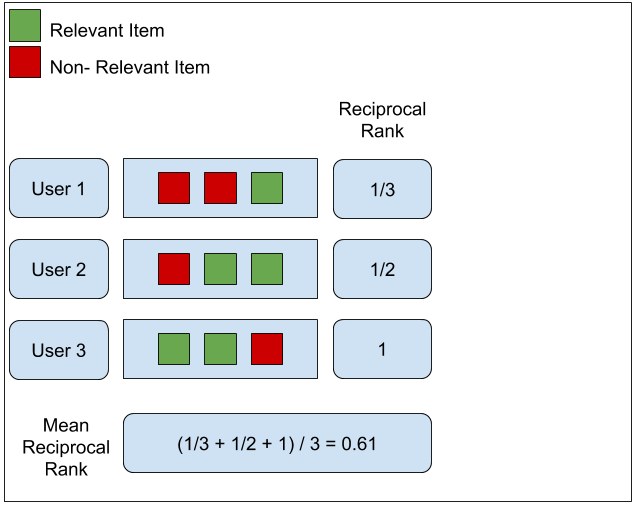

In [1]:
import numpy as np

In [2]:
recommend_results = [[0, 0, 1], [0, 1, 1], [1, 1, 0]]

In [3]:
print(np.asarray([0, 0, 1]).nonzero())
print(np.asarray([0, 1, 1]).nonzero())
print(np.asarray([1, 1, 0]).nonzero())

(array([2]),)
(array([1, 2]),)
(array([0, 1]),)


In [4]:
print(np.asarray([0, 0, 1]).nonzero()[0])
print(np.asarray([0, 1, 1]).nonzero()[0])
print(np.asarray([1, 1, 0]).nonzero()[0])

[2]
[1 2]
[0 1]


In [5]:
def mean_reciprocal_rank(recommend_results):
    rs = [np.asarray(r).nonzero()[0] for r in recommend_results]
    print(rs)
    return np.mean([1. / (r[0] + 1) for r in rs])

In [6]:
mean_reciprocal_rank(recommend_results)

[array([2]), array([1, 2]), array([0, 1])]


0.611111111111111

## 使用 sklearn 的 MRR

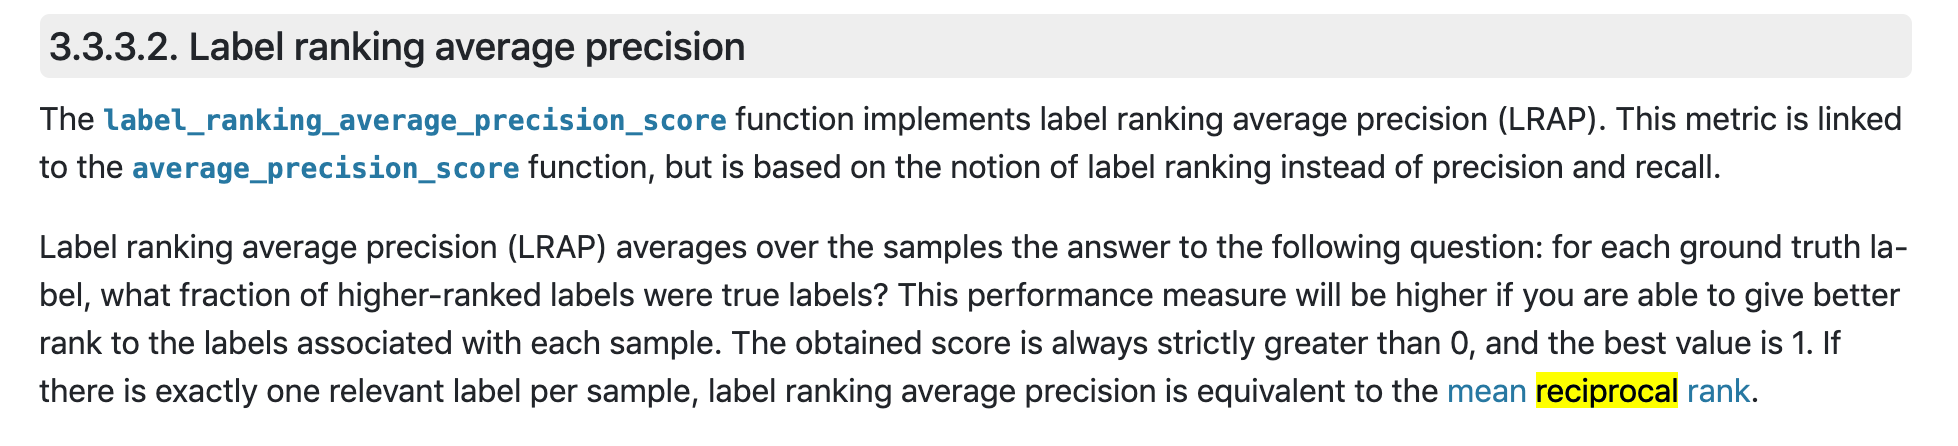

In [19]:
def get_mrr(y_true, y_score):     
    from sklearn.metrics import label_ranking_average_precision_score
    new_y_true = []
    for user_rec in y_true:
        new_y_true_row = [0] * len(user_rec)
        index = np.asarray(user_rec).nonzero()[0][0]
        print(index)
        new_y_true_row[index] = 1
        new_y_true.append(new_y_true_row)
    
    return label_ranking_average_precision_score(new_y_true, y_score) 

In [20]:
get_mrr([[0, 0, 1], [0, 1, 1], [1, 1, 0]], [[3,2,1],[3,2,1],[3,2,1]])

2
1
0


0.611111111111111

# MAP/mAP: Mean Average Precision (平均精度均值)

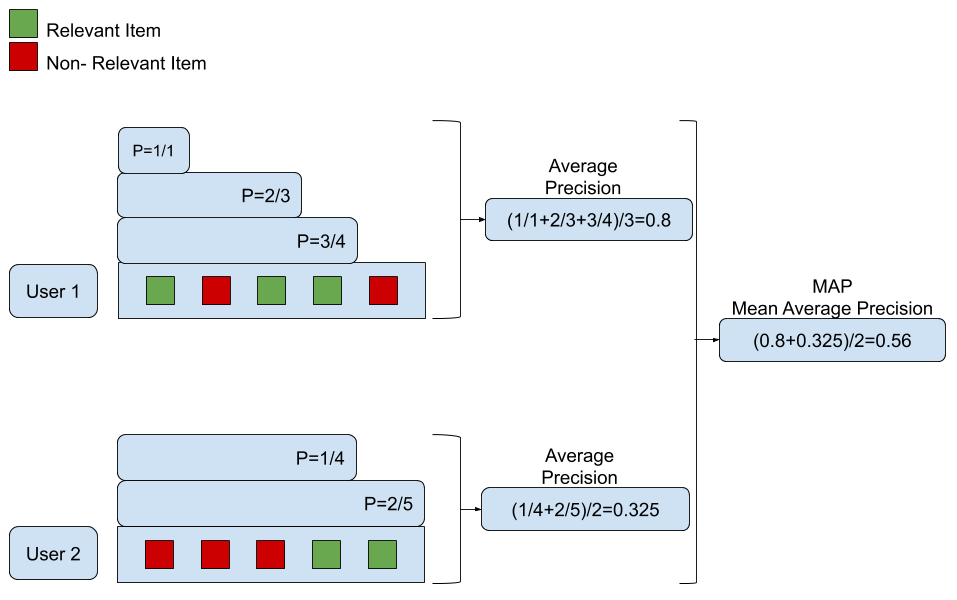

In [7]:
recommend_results = [[1, 0, 1, 1, 0], [0, 0, 0, 1, 1]]

In [8]:
def precision_at_k(r, k):
    r = np.asarray(r)[:k] != 0
    return np.mean(r)

def average_precision(r):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    return np.mean(out)

def mean_average_precision(recommend_results):
    return np.mean([average_precision(r) for r in recommend_results])

In [9]:
# map 
mean_average_precision(recommend_results)

0.5652777777777778

## 使用 sklearn 的 MAP

In [10]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(y_true= [[1, 0, 1, 1, 0], [0, 0, 0, 1, 1]] , y_score= [[5,4,3,2,1],[5,4,3,2,1]]) 

0.5652777777777778

# NDCG: Normalized Discounted Cumulative Gain(標準化折扣累積增益)

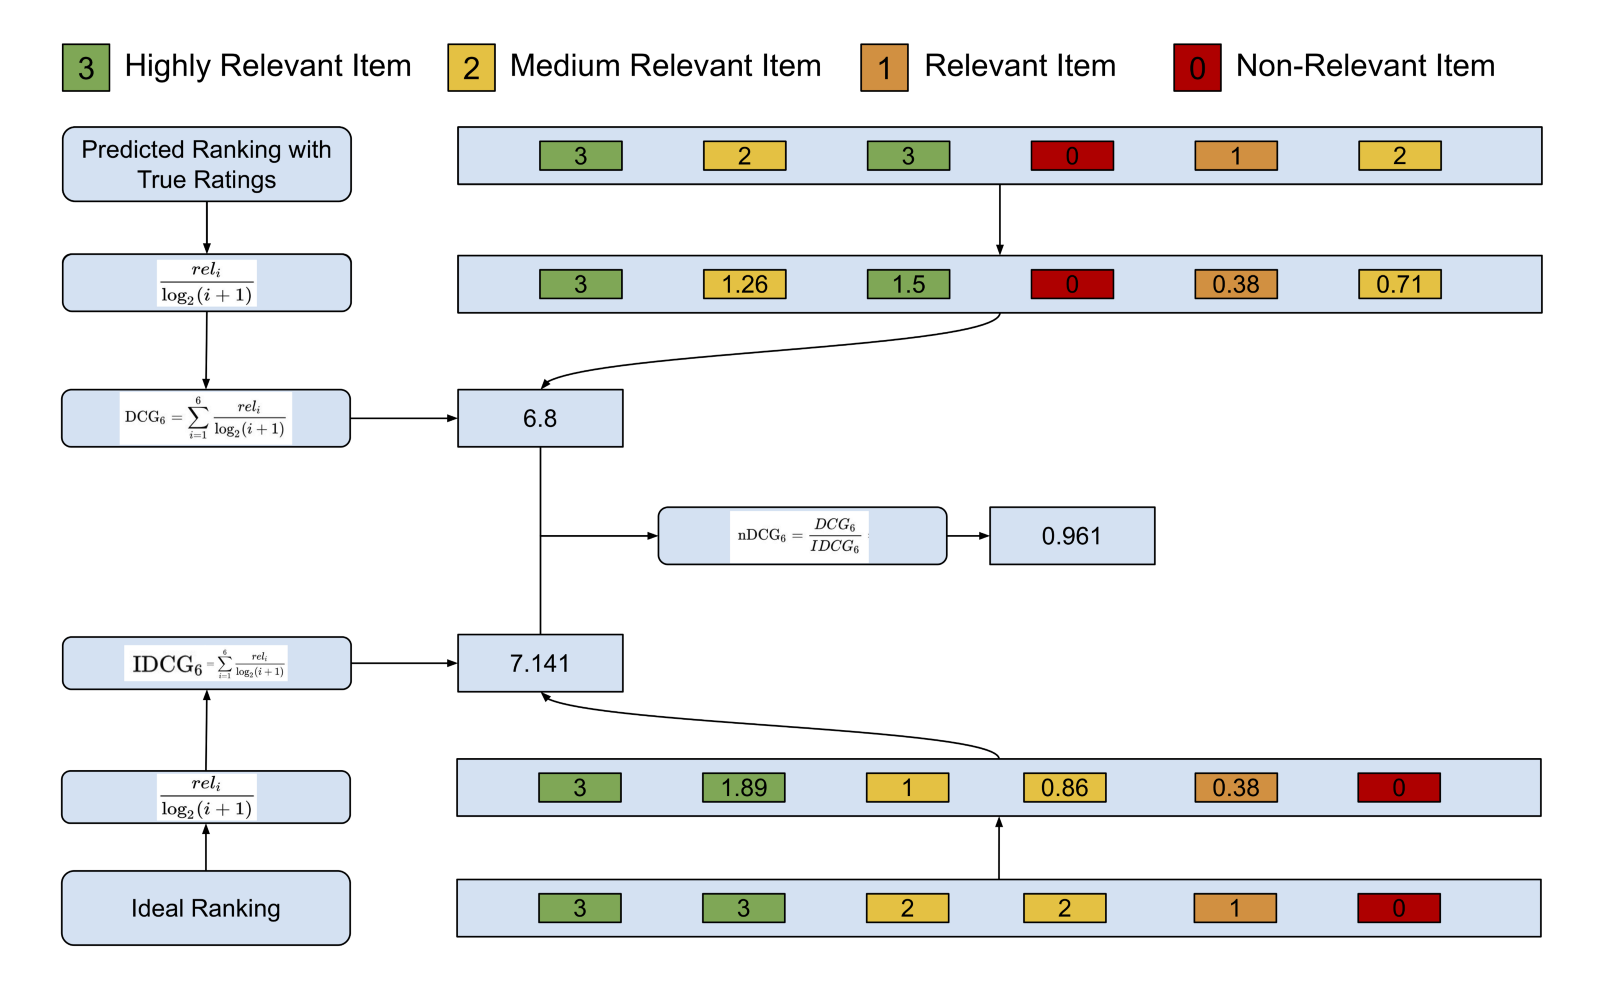

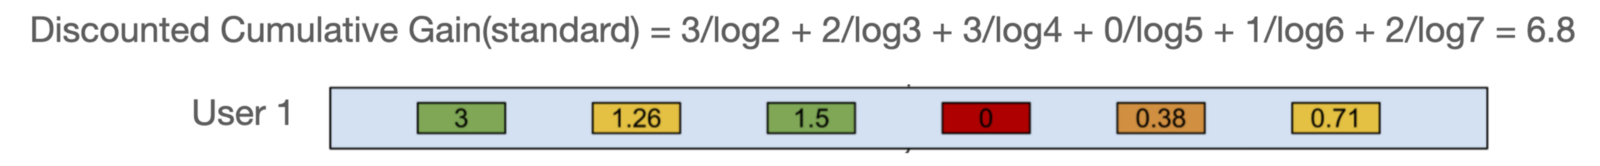

In [10]:
recommend_results = [3, 2, 3, 0, 1, 2]

In [17]:
np.arange(2, 5)

array([2, 3, 4])

In [12]:
r = np.asarray(recommend_results) 

In [13]:
np.arange(2, r.size + 2)

array([2, 3, 4, 5, 6, 7])

In [14]:
r = np.asarray([3, 2, 3, 0, 1, 2]) 
(r / np.log2(np.arange(2, r.size + 2)))

array([3.        , 1.26185951, 1.5       , 0.        , 0.38685281,
       0.71241437])

In [15]:
def dcg_at_k(r, k):
    r = np.asarray(r)[:k]
    print(r)
    return np.sum(r / np.log2(np.arange(2, r.size + 2)))            


def ndcg_at_k(r, k):
    dcg = dcg_at_k(r, k)
    dcg_ideal = dcg_at_k(sorted(r, reverse=True), k)
    return dcg / dcg_ideal

In [16]:
ndcg_at_k(recommend_results, 6)

[3 2 3 0 1 2]
[3 3 2 2 1 0]


0.9608081943360617

## 使用 sklearn 的 NDCG

In [22]:
from sklearn.metrics import ndcg_score

In [28]:
ndcg_score(y_true=[[3,2,3,0,1,2]], y_score=[[52,4,3,2,1,0]])

0.9608081943360616